# Airquality analysis v1.2

### Description
With this notebook you can analyze and plot the content of the airquality database.
Go through the notebook cell by cell and fill in the missing Todo. 
If you never heard about Jupyter notebook, i can recommend this video to get a basic glimpse of the concept. 
https://www.youtube.com/watch?v=jZ952vChhuI
---

### Python import and data query

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

from matplotlib.dates import DateFormatter

%matplotlib inline

### Data import from the database

In [4]:
db_path = 'airquality.db' #path to airquality.db
con = sqlite3.connect(db_path)

# import all datapoints from each sensor
no2 = pd.read_sql_query("SELECT * from NO2", con)
co = pd.read_sql_query("SELECT * from CO", con)
o3 = pd.read_sql_query("SELECT * from O3", con)

# configure the table for easier usage and drop useless columns
no2.index = pd.to_datetime(no2['timestamp'])
co.index = pd.to_datetime(co['timestamp'])
o3.index = pd.to_datetime(o3['timestamp'])

no2.drop(['id', 'timestamp'], axis = 1, inplace = True)
co.drop(['id', 'timestamp'], axis = 1, inplace = True)
o3.drop(['id', 'timestamp'], axis = 1, inplace = True)

# display the import with DataFrame.head()
print(no2.head())
print(no2.dtypes)

                            value unit  temperature   humidity
timestamp                                                     
2022-04-21 10:20:38.333760  0.008  ppm    18.722000  26.190000
2022-04-21 10:21:21.865158  0.007  ppm    18.453333  27.433333
2022-04-21 10:22:03.940100  0.007  ppm    17.168000  28.387333
2022-04-21 10:22:47.489067  0.007  ppm    16.590000  30.186667
2022-04-21 10:23:29.985511  0.007  ppm    17.376667  29.500000
value          float64
unit            object
temperature    float64
humidity       float64
dtype: object


---
## Basic infromation and stats about the data
As of now we have the data imported from the database and can work with it in the notebook. 
With DataFrame.head() you can easily investigate the first column of the db visually. We will now investigate the data a bit more in detail and will:
- arithmetic average
- variance

Use DataFrame.describe() to calculate the values and print it in a readable format. 
For the temperature and Humidity you only need to plot the data in one table since the entries are identical. 

In [13]:
# TODO Calculate average and variance of the data

---
## Apply conversion factors
Now we want to convert the data from concentration to volumetric values. 
You can find the conversion factors in the course script.

In [15]:
# TODO Convert the values

---
## Plot the data

Now it is time to plot the values of each sensor. Figure out your own way, how the plot should look like. Try scatterplots, histograms or lineplots for instance. 

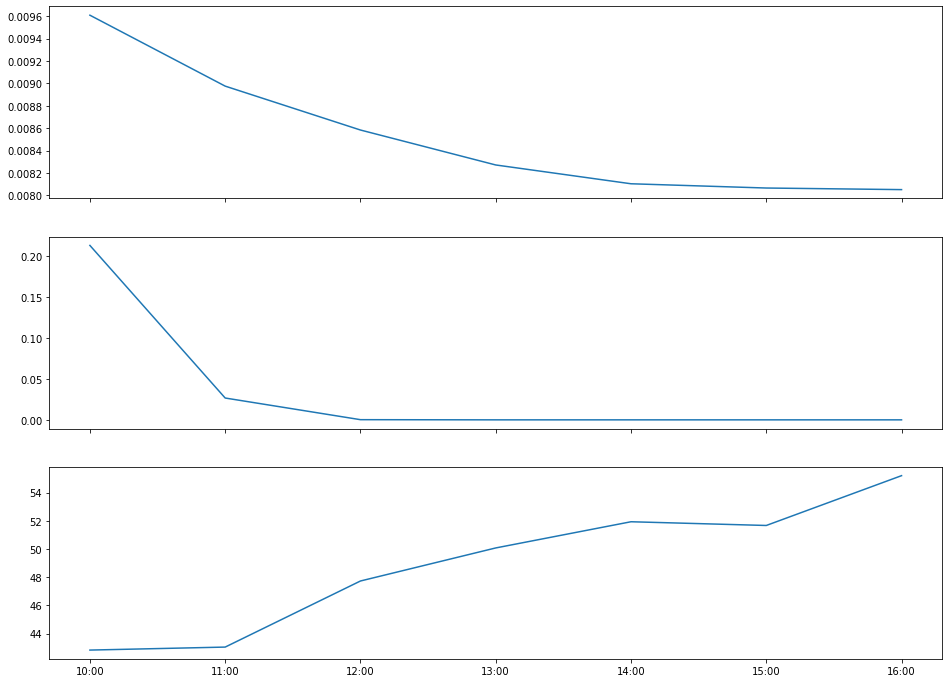

In [16]:
#no2 plot
fig, ax = plt.subplots(3,1, figsize=(16,12), sharex = True)

ax[0].plot(no2["value"])
ax[1].plot(co["value"])
ax[2].plot(o3["value"])

hh_mm = DateFormatter('%H:%M')
ax[2].xaxis.set_major_formatter(hh_mm)


### Plot temperature and humidity in same timeframe

In [9]:
#TODO Plot temperature and humidity in the same timeframe

---
## Interpretation of the data
 What can you deduce from the graphs above?

## Resampling of the data

With the very simple function data.resample() you can calculate groups of data that fit a specific timeframe. Each group can then for instance be averaged. This is an easy way to resample on a different timescale. 

In [11]:
no2 = no2.resample('1H').mean()
co = co.resample('1H').mean()
o3 = o3.resample('1H').mean()

In [12]:
# ToDo plot the resampled data